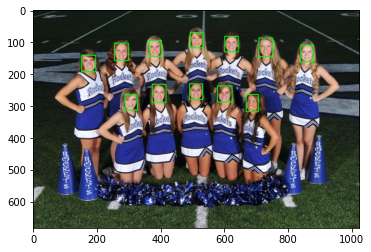

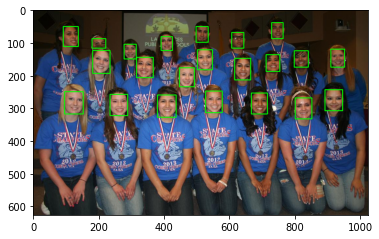

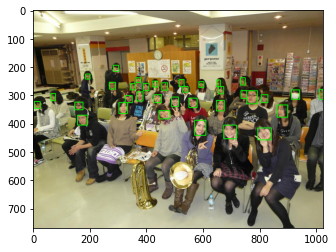

save_dir already exist.
Checking cropped images...
7_Cheering_Cheering_7_74 12


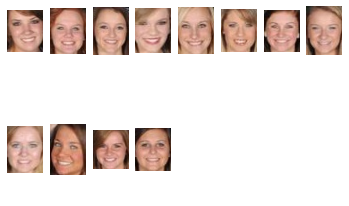

7_Cheering_Cheering_7_543 22


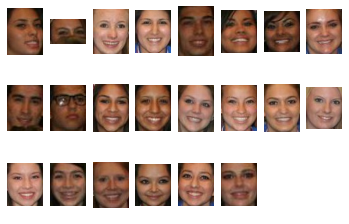

7_Cheering_Cheering_7_889 35


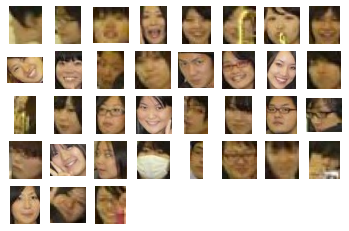

Face Detection using dlib:
7_Cheering_Cheering_7_74.jpg #det12 #gt12


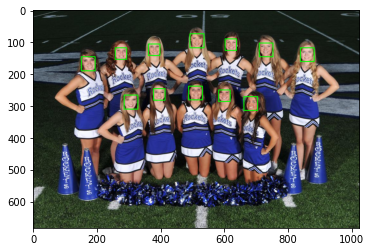

7_Cheering_Cheering_7_543.jpg #det21 #gt22


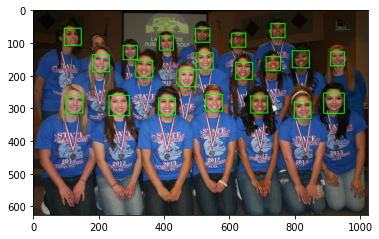

7_Cheering_Cheering_7_889.jpg #det7 #gt35


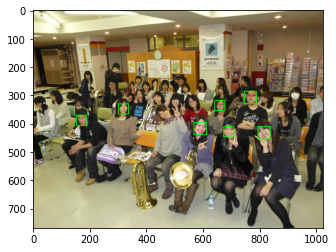

In [9]:
import os, sys
import pickle
import numpy as np
import cv2
import dlib
import matplotlib.pyplot as plt
%matplotlib inline

pkl_path = 'annotation.pkl'
annotate_dict = pickle.load(open(pkl_path,"rb"))
data_dir = 'data_dir'
bbox_num = 0
bbox_num_list = []

def draw_bbox():
  global bbox_num,bbox_num_list
  # Enter your code here and remove the following pass (20%)
  for img_name in annotate_dict:
      #img_num = img_num + 1
      #img_num_list.append(img_num)
      img_path = os.path.join(data_dir, img_name)
      img = cv2.imread(img_path)
      
      for bbox in annotate_dict[img_name]:   
          cv2.rectangle(img, (int(bbox[0]),int(bbox[1])), (int(bbox[2]),int(bbox[3])), (0,255,0), thickness = 2)
          bbox_num = bbox_num + 1
        
      
      bbox_num_list.append(bbox_num)  
      bbox_num = 0
      img = img[:,:,::-1]
      plt.imshow(img) 
      plt.show()

def save_bbox():
    save_dir = 'save_dir' # Do not change this line
    # Enter your code here (20%)
    
    if(os.path.exists(save_dir)):
        print('save_dir already exist.')
    else:
        os.mkdir(save_dir)
          
        
    for img_name in annotate_dict:

        img_path = os.path.join(data_dir, img_name)
        img = plt.imread(img_path)
        img_copy = img.copy()
        img_copy = img_copy[:,:,::-1]
        
        for j,bbox in enumerate(annotate_dict[img_name]):
            x1, y1, x2, y2 =bbox
            img_crop = img_copy[y1:y2, x1:x2]    
            name, ext = os.path.splitext(img_name)
            save_name = name + '_' + str(j) +'.jpg'
            save_path = os.path.join(save_dir, save_name)
            cv2.imwrite(save_path, img_crop)
        
        
# Do not modify the following two functions. They will be used to check your code.
def display_img_list(img_list):
     col = 8
     row = int(np.ceil(len(img_list)/8))
     k = 0
     fig, ax = plt.subplots(row, col)
     for i in range(row):
       for j in range(col):
         k = j+i*col
         if k < len(img_list):
           ax[i,j].imshow(img_list[k])
         ax[i,j].axis('off')
     plt.show()

def check_bbox():
  save_dir = 'save_dir'
  data_dict = {}
  if not os.path.exists(save_dir):
     print('save_dir is not created!')
     return
  if len(os.listdir(save_dir)) < 10:
     print('cropped faces are not generated!')
     return
  for img_name in annotate_dict:
     img_name = img_name[:-4]
     data_dict[img_name] = []
     for bbox_name in os.listdir(save_dir):
       if img_name in bbox_name:
         bbox_path = os.path.join(save_dir, bbox_name)
         img = cv2.imread(bbox_path)
         data_dict[img_name].append(img[:,:,::-1])
  for img_name in data_dict:
     print(img_name, len(data_dict[img_name]))
     display_img_list(data_dict[img_name])

def test_dlib():
    global bbox_num
    num = 0
    
  # Enter your code here and remove the following pass (25%)
    for img_name in annotate_dict:
        num = num +1
        img_path = os.path.join(data_dir, img_name)
        detector = dlib.get_frontal_face_detector()
        img = cv2.imread(img_path)
        
        dets = detector(img,1)
        #plt.imshow(dets)
        bbox_number = bbox_num_list[num - 1]
        det_num = len(dets)
        print(img_name + ' #det'+ str(det_num) + ' #gt' + str(bbox_number))
        

        for det in dets:
            x1, y1, x2, y2 = det.left(), det.top(), det.right(), det.bottom()
            #print(x1, y1, x2, y2)
            cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0,255,0), 2)
        img = img[:,:,::-1]    
        plt.imshow(img) 
        plt.show()    
            

if __name__ == '__main__':
  # When submitting assignment_2a, please do not modify the following lines  
  
  draw_bbox()
  save_bbox()
  print('Checking cropped images...')  
  check_bbox()
  print('Face Detection using dlib:')
  
  test_dlib()
  

In [21]:
# Explain the reason why dlib cannot detect all the faces in 7_Cheering_Cheering_7_889.jpg (5%)
# Write down your answer here.
#Ans:因為有些臉不是正的(旋轉一定角度或側臉)，有些被遮住超過一半(例如戴口罩，被其他人擋住，被畫面截掉)，或是臉的顏色與背景非常相近。